In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data=pd.read_csv('heart2.csv')

In [4]:
data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:

# First, print out the column names to verify they are correctly spelled and exist in the data
print("Columns in the dataset:", data.columns)

# Convert categorical columns to one-hot encoding
# Make sure each column name here exists in your dataset; adjust as necessary based on the printout
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)  # 'drop_first=True' for a reduced dataset size

# Check continuous columns and bin them
data['Age_Bin'] = pd.cut(data['Age'], bins=[0, 30, 40, 50, 60, 70, 80], labels=['0-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
data['RestingBP_Bin'] = pd.cut(data['RestingBP'], bins=[0, 120, 140, 160, 180, 200], labels=['0-120', '120-140', '140-160', '160-180', '180-200'])
data['Cholesterol_Bin'] = pd.cut(data['Cholesterol'], bins=[0, 150, 200, 250, 300, 400], labels=['0-150', '150-200', '200-250', '250-300', '300+'])
data['MaxHR_Bin'] = pd.cut(data['MaxHR'], bins=[0, 100, 120, 140, 160, 180, 200], labels=['0-100', '100-120', '120-140', '140-160', '160-180', '180+'])

# Convert binned columns to one-hot encoding
binned_columns = ['Age_Bin', 'RestingBP_Bin', 'Cholesterol_Bin', 'MaxHR_Bin']
data = pd.get_dummies(data, columns=binned_columns, drop_first=True)

# Drop original continuous columns if needed
data.drop(['Age', 'RestingBP', 'Cholesterol', 'MaxHR'], axis=1, inplace=True)

# Ensure data is boolean for Apriori
data = data.astype(bool)
print("Transformed dataset ready for Apriori:", data.head())


Columns in the dataset: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
Transformed dataset ready for Apriori:    FastingBS  Oldpeak  HeartDisease  Sex_M  ChestPainType_ATA  \
0      False    False         False   True               True   
1      False     True          True  False              False   
2      False    False         False   True               True   
3      False     True          True  False              False   
4      False    False         False   True              False   

   ChestPainType_NAP  ChestPainType_TA  RestingECG_Normal  RestingECG_ST  \
0              False             False               True          False   
1               True             False               True          False   
2              False             False              False           True   
3              False             False        

In [6]:
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Apply Apriori to generate frequent itemsets
# Setting min_support to 0.05 (or adjust based on your data's needs)
frequent_itemsets = apriori(data, min_support=0.05, use_colnames=True)

# Display the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# 2. Generate association rules from the frequent itemsets
# Setting a minimum confidence of 0.6 (adjust as needed)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Display the rules
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Frequent Itemsets:
       support                                           itemsets
0     0.233115                                        (FastingBS)
1     0.599129                                          (Oldpeak)
2     0.553377                                     (HeartDisease)
3     0.789760                                            (Sex_M)
4     0.188453                                (ChestPainType_ATA)
...        ...                                                ...
1097  0.065359  (Sex_M, ExerciseAngina_Y, ST_Slope_Flat, Resti...
1098  0.052288  (Sex_M, MaxHR_Bin_120-140, ExerciseAngina_Y, R...
1099  0.053377  (Sex_M, RestingECG_Normal, ExerciseAngina_Y, O...
1100  0.062092  (Sex_M, ExerciseAngina_Y, ST_Slope_Flat, Oldpe...
1101  0.052288  (Sex_M, MaxHR_Bin_120-140, ExerciseAngina_Y, S...

[1102 rows x 2 columns]

Association Rules:
                                            antecedents  \
0                                           (FastingBS)   
1                         

In [7]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply Apriori with a minimum support of 0.05
frequent_itemsets = apriori(data, min_support=0.05, use_colnames=True)

# Generate association rules with minimum confidence of 0.7 and lift > 1
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = rules[rules['lift'] > 1]

# Display the resulting rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                                            antecedents  \
0                                           (FastingBS)   
1                                           (FastingBS)   
2                                           (FastingBS)   
3                                        (HeartDisease)   
4                                             (Oldpeak)   
...                                                 ...   
2072  (HeartDisease, MaxHR_Bin_120-140, RestingBP_Bi...   
2073  (RestingBP_Bin_120-140, Oldpeak, MaxHR_Bin_120...   
2074  (HeartDisease, RestingBP_Bin_120-140, MaxHR_Bi...   
2075  (HeartDisease, RestingBP_Bin_120-140, MaxHR_Bi...   
2076  (MaxHR_Bin_120-140, RestingBP_Bin_120-140, Exe...   

                                        consequents   support  confidence  \
0                                         (Oldpeak)  0.173203    0.742991   
1                                    (HeartDisease)  0.185185    0.794393   
2                                           (Sex_M)  0.20479

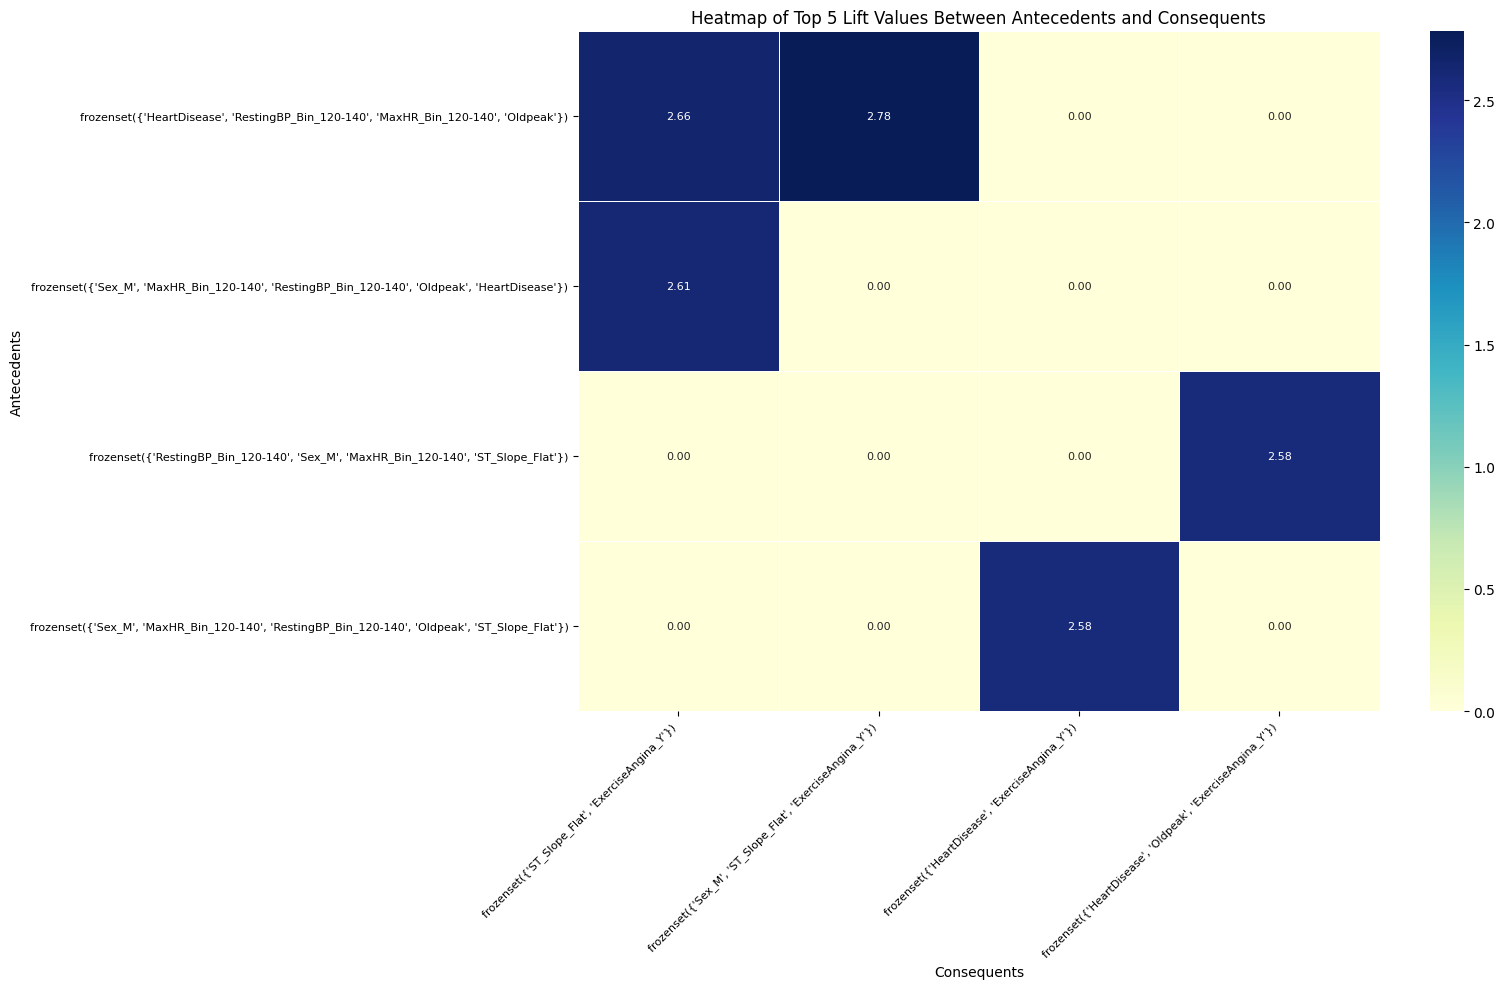

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top N rules based on lift (adjusted to 5 for a less crowded output)
top_n = 5
top_rules = rules.nlargest(top_n, 'lift')

# Create the pivot table for top rules
lift_matrix = top_rules.pivot_table(index="antecedents", columns="consequents", values="lift", fill_value=0)

# Plot the heatmap with increased figure size and using tight_layout
plt.figure(figsize=(16, 10))  # Larger figure size
sns.heatmap(lift_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5,
            annot_kws={"size": 8})  # Smaller font for annotations
plt.title(f"Heatmap of Top {top_n} Lift Values Between Antecedents and Consequents")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.xticks(rotation=45, ha="right", fontsize=8)  # Smaller font for ticks
plt.yticks(fontsize=8)
plt.tight_layout()  # Use tight_layout to avoid overlap
plt.show()


In [9]:
# Print out the column names to verify they are correctly spelled and exist in the data
print("Columns in the dataset:", data.columns)

# Check if all specified categorical columns exist
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
missing_cols = [col for col in categorical_columns if col not in data.columns]
if missing_cols:
    print(f"Warning: The following categorical columns are missing: {missing_cols}")
# Only keep columns that actually exist in the dataset
categorical_columns = [col for col in categorical_columns if col in data.columns]

# Convert categorical columns to one-hot encoding
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Check continuous columns and bin them
if 'Age' in data.columns:
    data['Age_Bin'] = pd.cut(data['Age'], bins=[0, 30, 40, 50, 60, 70, 80], labels=['0-30', '30-40', '40-50', '50-60', '60-70', '70-80'])
if 'RestingBP' in data.columns:
    data['RestingBP_Bin'] = pd.cut(data['RestingBP'], bins=[0, 120, 140, 160, 180, 200], labels=['0-120', '120-140', '140-160', '160-180', '180-200'])
if 'Cholesterol' in data.columns:
    data['Cholesterol_Bin'] = pd.cut(data['Cholesterol'], bins=[0, 150, 200, 250, 300, 400], labels=['0-150', '150-200', '200-250', '250-300', '300+'])
if 'MaxHR' in data.columns:
    data['MaxHR_Bin'] = pd.cut(data['MaxHR'], bins=[0, 100, 120, 140, 160, 180, 200], labels=['0-100', '100-120', '120-140', '140-160', '160-180', '180+'])

# Convert binned columns to one-hot encoding
binned_columns = ['Age_Bin', 'RestingBP_Bin', 'Cholesterol_Bin', 'MaxHR_Bin']
binned_columns = [col for col in binned_columns if col in data.columns]  # Remove any that are missing
data = pd.get_dummies(data, columns=binned_columns, drop_first=True)

# Drop original continuous columns if they still exist
continuous_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']
continuous_columns = [col for col in continuous_columns if col in data.columns]  # Filter only present columns
data.drop(continuous_columns, axis=1, inplace=True)

# Ensure data is boolean for Apriori/FP-Growth
data = data.astype(bool)
print("Transformed dataset ready for Apriori/FP-Growth:", data.head())


Columns in the dataset: Index(['FastingBS', 'Oldpeak', 'HeartDisease', 'Sex_M', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal',
       'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up',
       'Age_Bin_30-40', 'Age_Bin_40-50', 'Age_Bin_50-60', 'Age_Bin_60-70',
       'Age_Bin_70-80', 'RestingBP_Bin_120-140', 'RestingBP_Bin_140-160',
       'RestingBP_Bin_160-180', 'RestingBP_Bin_180-200',
       'Cholesterol_Bin_150-200', 'Cholesterol_Bin_200-250',
       'Cholesterol_Bin_250-300', 'Cholesterol_Bin_300+', 'MaxHR_Bin_100-120',
       'MaxHR_Bin_120-140', 'MaxHR_Bin_140-160', 'MaxHR_Bin_160-180',
       'MaxHR_Bin_180+'],
      dtype='object')
Transformed dataset ready for Apriori/FP-Growth:    FastingBS  Oldpeak  HeartDisease  Sex_M  ChestPainType_ATA  \
0      False    False         False   True               True   
1      False     True          True  False              False   
2      False    False         False   True    

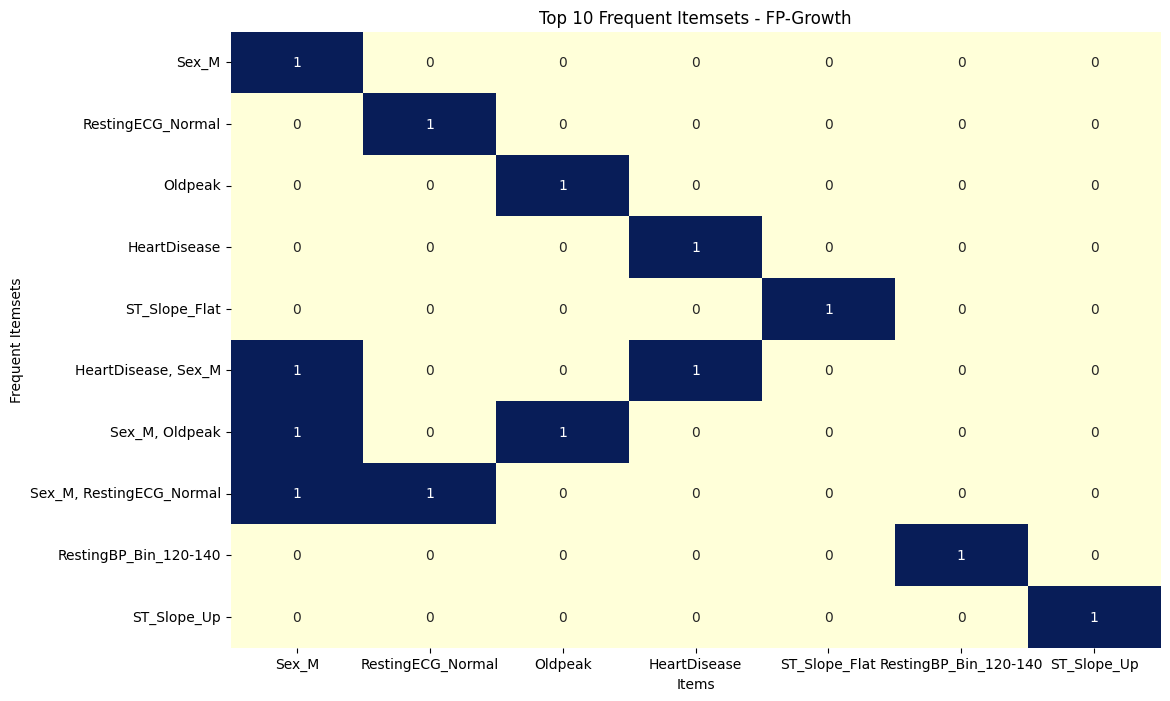

In [10]:
# Import the mlxtend library
from mlxtend.frequent_patterns import fpgrowth
# Apply FP-Growth algorithm with a lower min_support to capture more combinations
frequent_itemsets = fpgrowth(data, min_support=0.03, use_colnames=True)

# Sort itemsets by support and select the top 10 for visualization
top_itemsets = frequent_itemsets.nlargest(10, 'support').copy()

# Prepare the data for heatmap visualization
# Create a binary matrix where each row is an itemset and each column an item
itemset_matrix = pd.DataFrame([
    {item: 1 for item in itemset} for itemset in top_itemsets['itemsets']
]).fillna(0)

# Set the index to be descriptive with itemsets and support
itemset_matrix.index = top_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(itemset_matrix, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Top 10 Frequent Itemsets - FP-Growth")
plt.xlabel("Items")
plt.ylabel("Frequent Itemsets")
plt.show()


In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is already preprocessed as per your code

# Convert the boolean dataset back to integers (0 and 1) for K-Means
data = data.astype(int)

# Standardize the dataset to normalize feature scales
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply K-Means algorithm
# Choose the number of clusters (k) based on domain knowledge or techniques like the elbow method
kmeans = KMeans(n_clusters=3, random_state=42)  # Example: 3 clusters
kmeans.fit(scaled_data)

# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Print cluster centers and labels
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Cluster Labels:\n", kmeans.labels_)

# Save the transformed dataset with cluster labels
data.to_csv('heart2_clustered.csv', index=False)
print("Clustered dataset saved to 'heart2_clustered.csv'")


Cluster Centers:
 [[ 0.26182779  0.44656221  0.73565233  0.27329829 -0.39569352 -0.22419473
  -0.08547592 -0.10364043  0.18026691  0.62351235  0.6382723  -0.72381688
  -0.20348344 -0.19440237  0.06982665  0.24360402  0.08965527 -0.0286191
   0.15493352  0.08253847  0.05130542 -0.15480123 -0.12586694 -0.01583589
   0.01792922  0.36354265  0.24365801 -0.35519493 -0.37314196 -0.14363565]
 [-0.27748768 -0.59247379 -0.85903118 -0.24180961  0.43327285  0.23653742
   0.07589382  0.14065386 -0.1620716  -0.66625225 -0.77761909  0.89555022
   0.2464691   0.23537605 -0.08747805 -0.32614215 -0.03190693  0.06547014
  -0.13297554 -0.08915726 -0.01825881  0.18759494  0.13314691  0.01090537
  -0.0229048  -0.24636885  0.02420841 -0.57818883  0.87298929  0.33689364]
 [-0.19909244 -0.1588572  -0.43905001 -0.28032979  0.27979178  0.17209303
   0.08727152  0.03209385 -0.18100195 -0.46585694 -0.33196667  0.35567393
   0.10801296  0.10333447 -0.03266817 -0.08219829 -0.16384638 -0.03150792
  -0.16514569 -0.06

In [3]:
data2 = pd.read_csv("heart (1).csv")

In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
from kmodes.kmodes import KModes
import pandas as pd

# Load and preprocess the data
data = pd.read_csv("heart (1).csv")
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']  # Example categorical columns
data_categorical = data[categorical_columns]

# Fit K-Modes
kmodes = KModes(n_clusters=3, init="Huang", random_state=42)
clusters = kmodes.fit_predict(data_categorical)

# Add cluster labels
data['Cluster'] = clusters
print("Cluster Labels:\n", clusters)
print("Cluster Modes:\n", kmodes.cluster_centroids_)

# Save results
data.to_csv('heart_kmodes_clustered.csv', index=False)


Cluster Labels:
 [0 0 1 0 0 0 1 0 0 0 0 0 0 2 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 2 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 2 0 0 2
 0 1 0 0 0 2 0 0 0 0 1 1 0 0 0 1 0 2 0 1 1 2 1 0 0 0 0 2 0 0 0 1 1 1 0 1 0
 0 0 0 0 0 0 2 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 2 2 0 0 0 0 1 0 0 0
 0 0 0 1 2 1 0 1 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 0 1 0 2 2 2 0 2 2 2 1 1 2 2
 0 2 2 0 2 2 2 2 2 0 2 0 2 2 0 0 2 2 2 1 2 2 1 0 2 2 2 2 2 2 2 0 2 2 2 1 2
 1 2 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 2 0 2 2 2 1 2 0 2 2 2 1
 2 2 0 2 1 2 2 1 0 2 2 2 0 0 0 2 0 2 0 1 2 2 2 0 0 2 2 0 0 2 2 0 0 1 2 2 2
 1 1 2 0 2 2 1]
Cluster Modes:
 [[1 2 0 1 0 2 0 2]
 [0 0 0 0 0 1 0 2]
 [1 0 0 0 1 1 0 3]]


In [6]:
from pymedoid import KMedoids
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load and preprocess the data
data = pd.read_csv("heart (1).csv")

# Select numerical columns for K-Medoids (categorical values can be encoded if needed)
numerical_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
data_numerical = data[numerical_columns]

# Standardize the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numerical)

# Fit K-Medoids
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(scaled_data)

# Add cluster labels to the original dataset
data['Cluster'] = kmedoids.labels_
print("Cluster Labels:\n", kmedoids.labels_)
print("Cluster Centers:\n", kmedoids.cluster_centers_)

# Save the clustered dataset
data.to_csv("heart_kmedoids_clustered.csv", index=False)
print("Clustered dataset saved to 'heart_kmedoids_clustered.csv'")


ModuleNotFoundError: No module named 'pymedoid'

In [ ]:
#FOR K MEDOIDES
#ERROR: Could not find a version that satisfies the requirement pymedoid (from versions: none)
#ERROR: No matching distribution found for pymedoid

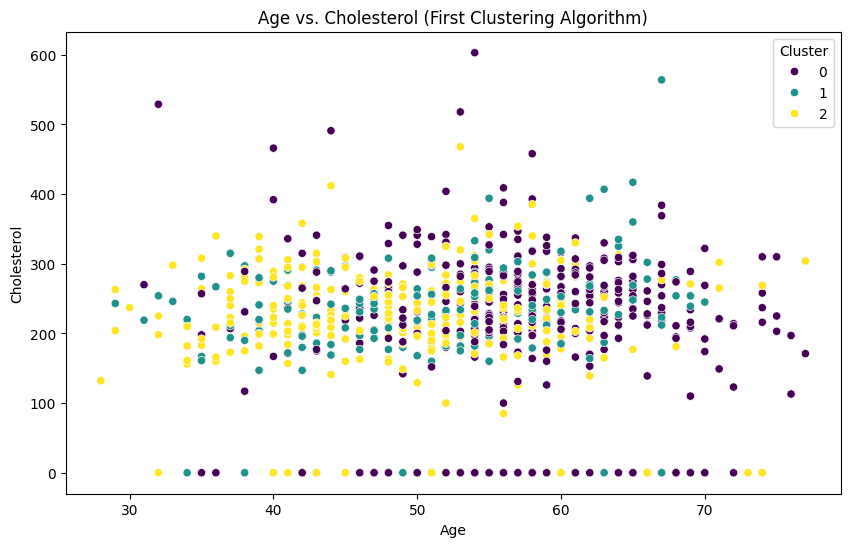

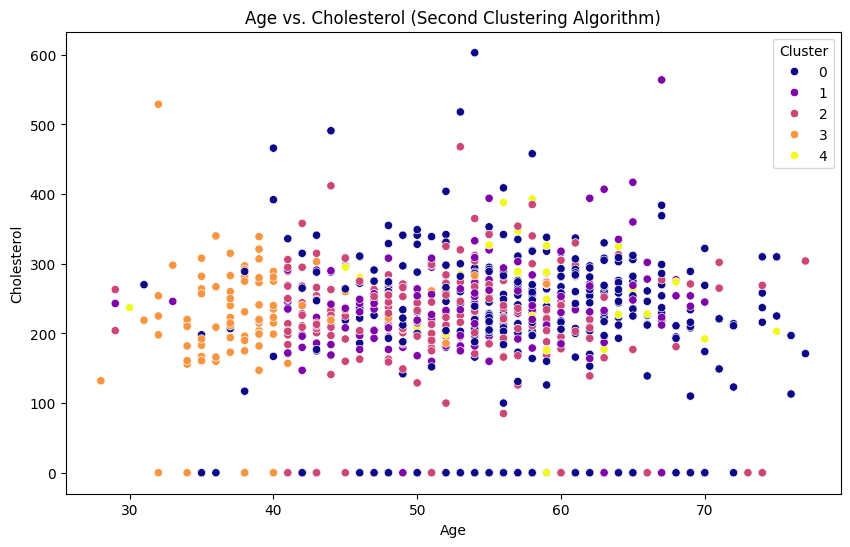

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set random seed
seed_val = 38
np.random.seed(seed_val)

# Assuming 'data' is preprocessed and has numerical values
data = data.astype(int)

# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Run the first clustering algorithm
k1 = 3  # Number of clusters for the first algorithm
first_clust = KMeans(n_clusters=k1, n_init=1, random_state=seed_val)
first_clust.fit(scaled_data)
data['first_clust'] = first_clust.labels_

# Run the second clustering algorithm
k2 = 5  # Number of clusters for the second algorithm
second_clust = KMeans(n_clusters=k2, n_init=1, random_state=seed_val)
second_clust.fit(scaled_data)
data['second_clust'] = second_clust.labels_

# Assuming 'Age' and 'Cholesterol' columns exist in the original dataset for plotting
# Replace 'Age' and 'Cholesterol' with your column names if they were renamed
data['Age'] = pd.read_csv('heart2.csv')['Age']  # Replace with your original Age column
data['Cholesterol'] = pd.read_csv('heart2.csv')['Cholesterol']  # Replace with your original Cholesterol column

# Plotting the first clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Cholesterol', hue='first_clust', palette='viridis')
plt.title('Age vs. Cholesterol (First Clustering Algorithm)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Cluster')
plt.show()

# Plotting the second clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Cholesterol', hue='second_clust', palette='plasma')
plt.title('Age vs. Cholesterol (Second Clustering Algorithm)')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Cluster')
plt.show()


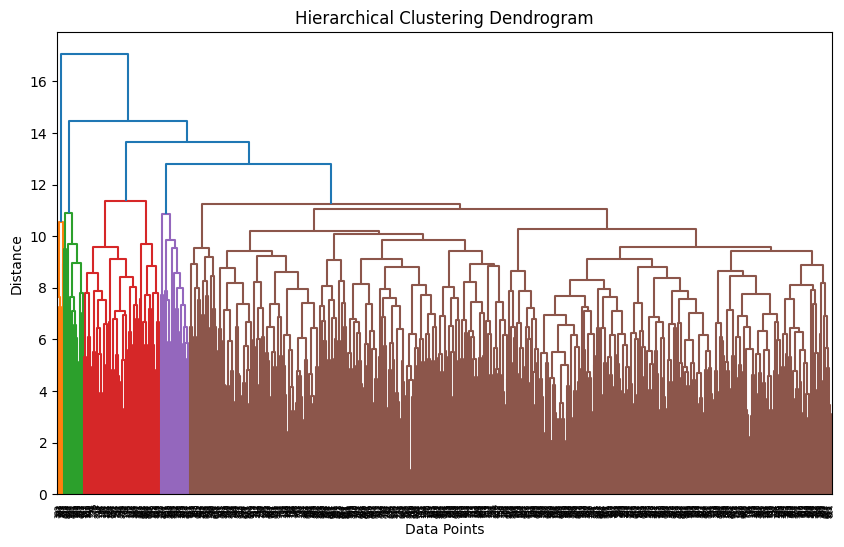

   FastingBS  Oldpeak  HeartDisease  Sex_M  ChestPainType_ATA  \
0          0        0             0      1                  1   
1          0        1             1      0                  0   
2          0        0             0      1                  1   
3          0        1             1      0                  0   
4          0        0             0      1                  0   

   ChestPainType_NAP  ChestPainType_TA  RestingECG_Normal  RestingECG_ST  \
0                  0                 0                  1              0   
1                  1                 0                  1              0   
2                  0                 0                  0              1   
3                  0                 0                  1              0   
4                  1                 0                  1              0   

   ExerciseAngina_Y  ...  MaxHR_Bin_120-140  MaxHR_Bin_140-160  \
0                 0  ...                  0                  0   
1                 0 

In [13]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'data' is preprocessed and numeric (0s and 1s for clustering)
data = data.astype(int)

# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform hierarchical clustering using complete linkage
hier_clust_1 = linkage(scaled_data, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(hier_clust_1, truncate_mode=None, color_threshold=None, labels=None)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Assign clusters (cut the dendrogram at 5 clusters)
k = 5
hc_1_assign = fcluster(hier_clust_1, t=k, criterion='maxclust')

# Add cluster assignments to the dataset
data['hc_1_assign'] = hc_1_assign

# Display the first few rows of the dataset with cluster assignments
print(data.head())


In [17]:
import pandas as pd

# Add cluster assignments from hierarchical clustering
data['hc_clust'] = hc_1_assign

# Remove specified columns ('Sex', 'first_clust', and 'second_clust') if they exist
columns_to_remove = ['Sex', 'first_clust', 'second_clust']
hd_simple = data.drop(columns=columns_to_remove, errors='ignore')

# Calculate mean and standard deviation for each cluster
clust_summary = hd_simple.groupby('hc_clust').agg(['mean', 'std'])

# Flatten the multi-index columns for easier readability
clust_summary.columns = ['_'.join(col).strip() for col in clust_summary.columns.values]

# Reset the index to display the cluster labels as a column
clust_summary.reset_index(inplace=True)

# Display the cluster summary
print(clust_summary)


   hc_clust  FastingBS_mean  FastingBS_std  Oldpeak_mean  Oldpeak_std  \
0         1        0.375000       0.517549      0.500000     0.534522   
1         2        0.333333       0.481543      0.750000     0.442326   
2         3        0.109890       0.314485      0.208791     0.408697   
3         4        0.352941       0.485071      0.735294     0.447811   
4         5        0.237845       0.426044      0.636005     0.481464   

   HeartDisease_mean  HeartDisease_std  Sex_M_mean  Sex_M_std  \
0           0.875000          0.353553    0.750000   0.462910   
1           0.666667          0.481543    0.750000   0.442326   
2           0.208791          0.408697    0.813187   0.391921   
3           0.676471          0.474858    0.735294   0.447811   
4           0.582129          0.493533    0.791064   0.406816   

   ChestPainType_ATA_mean  ...  MaxHR_Bin_180+_mean  MaxHR_Bin_180+_std  \
0                0.250000  ...             0.125000            0.353553   
1                0.1

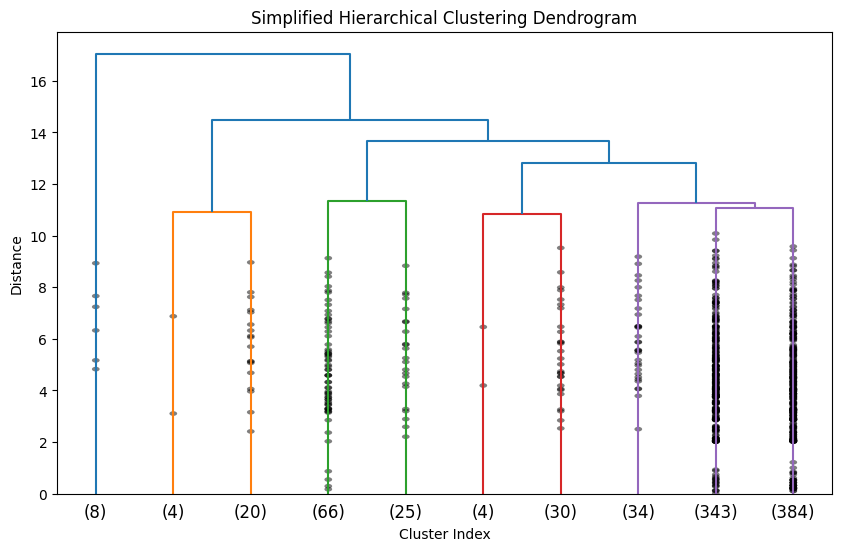

In [14]:
# Plot a simplified dendrogram
plt.figure(figsize=(10, 6))

# Truncate the dendrogram to show only the last 10 merges
dendrogram(
    hier_clust_1, 
    truncate_mode='lastp',  # Show only the last 'p' clusters
    p=10,                   # Adjust 'p' to control the number of clusters shown
    show_contracted=True,   # Show the rest of the tree as contracted
)

plt.title('Simplified Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Index')
plt.ylabel('Distance')
plt.show()


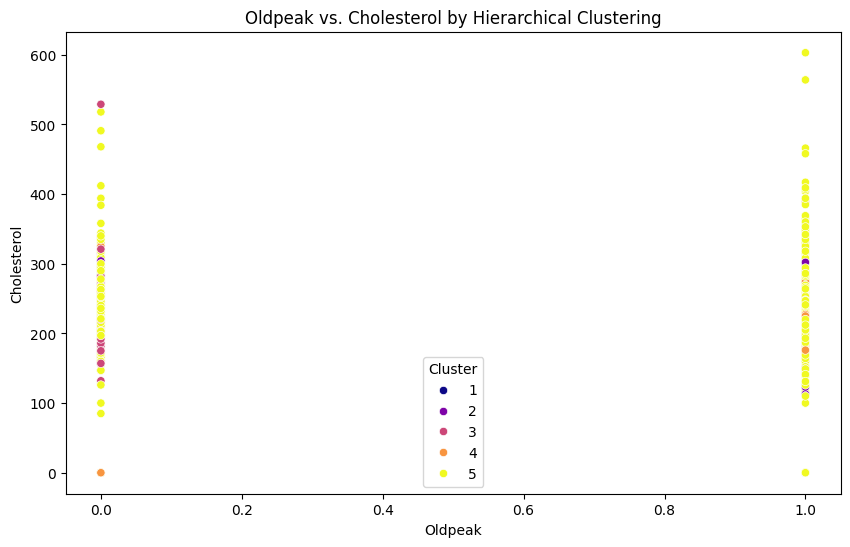

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Oldpeak vs. Cholesterol, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Oldpeak', y='Cholesterol', hue='hc_clust', palette='plasma')
plt.title('Oldpeak vs. Cholesterol by Hierarchical Clustering')
plt.xlabel('Oldpeak')
plt.ylabel('Cholesterol')
plt.legend(title='Cluster')
plt.show()


In [22]:
# Conclusions based on clustering results
explore_kmeans = False  # K-Means clustering did not show promise
explore_hierarch_complete = True  # Hierarchical clustering (complete linkage) showed promise
explore_hierarch_single = False  # Hierarchical clustering (single linkage) did not show promise

# Print the conclusions for clarity
print("Conclusions:")
print(f"Explore K-Means Clustering: {explore_kmeans}")
print(f"Explore Hierarchical Clustering (Complete Linkage): {explore_hierarch_complete}")
print(f"Explore Hierarchical Clustering (Single Linkage): {explore_hierarch_single}")


Conclusions:
Explore K-Means Clustering: False
Explore Hierarchical Clustering (Complete Linkage): True
Explore Hierarchical Clustering (Single Linkage): False


In [23]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [31]:
data = spark.read.csv('heart (1).csv', header = True)


In [32]:
df = pd.read_csv('heart (1).csv')
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [36]:
data.printSchema()

root
 |-- age: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- cp: string (nullable = true)
 |-- trtbps: string (nullable = true)
 |-- chol: string (nullable = true)
 |-- fbs: string (nullable = true)
 |-- restecg: string (nullable = true)
 |-- thalachh: string (nullable = true)
 |-- exng: string (nullable = true)
 |-- oldpeak: string (nullable = true)
 |-- slp: string (nullable = true)
 |-- caa: string (nullable = true)
 |-- thall: string (nullable = true)
 |-- output: string (nullable = true)



In [39]:
from pyspark.sql.types import *

# Write a custom function to convert the data type of DataFrame columns
def convertColumn(df, names, newType):
  for name in names: 
     df = df.withColumn(name, df[name].cast(newType))
  return df 
int_columns = ['age','sex','cp', 'trtbps','chol','fbs','restecg','thalachh','exng','slp','caa','thall','output']
float_column = ['oldpeak']
data = convertColumn(data, int_columns, IntegerType())
data = convertColumn(data, float_column, FloatType())

In [40]:
data.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trtbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalachh: integer (nullable = true)
 |-- exng: integer (nullable = true)
 |-- oldpeak: float (nullable = true)
 |-- slp: integer (nullable = true)
 |-- caa: integer (nullable = true)
 |-- thall: integer (nullable = true)
 |-- output: integer (nullable = true)



In [41]:
from pyspark.sql.types import IntegerType, FloatType

# Custom function to convert the data type of DataFrame columns
def convertColumn(df, names, newType):
    for name in names: 
        df = df.withColumn(name, df[name].cast(newType))  # Cast column to the specified type
    return df 

# Updated column names
int_columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'slp', 'caa', 'thall', 'output']
float_column = ['oldpeak']

# Apply the function to convert data types
data = convertColumn(data, int_columns, IntegerType())  # Convert integer columns
data = convertColumn(data, float_column, FloatType())  # Convert float columns

# Verify the schema after transformation
data.printSchema()


root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trtbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalachh: integer (nullable = true)
 |-- exng: integer (nullable = true)
 |-- oldpeak: float (nullable = true)
 |-- slp: integer (nullable = true)
 |-- caa: integer (nullable = true)
 |-- thall: integer (nullable = true)
 |-- output: integer (nullable = true)



In [42]:
data.persist()

DataFrame[age: int, sex: int, cp: int, trtbps: int, chol: int, fbs: int, restecg: int, thalachh: int, exng: int, oldpeak: float, slp: int, caa: int, thall: int, output: int]

In [44]:
data.take(1)
#Take one sample

[Row(age=63, sex=1, cp=3, trtbps=145, chol=233, fbs=1, restecg=0, thalachh=150, exng=0, oldpeak=2.299999952316284, slp=0, caa=0, thall=1, output=1)]

In [45]:
data.describe().show() # It is hard to see

+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|summary|               age|                sex|                cp|            trtbps|              chol|                fbs|          restecg|          thalachh|               exng|           oldpeak|               slp|               caa|             thall|            output|
+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|  count|               303|                303|               303|               303|               303|                303|              303|               303|    

In [47]:
data.describe('output').show()

+-------+------------------+
|summary|            output|
+-------+------------------+
|  count|               303|
|   mean|0.5445544554455446|
| stddev|0.4988347841643915|
|    min|                 0|
|    max|                 1|
+-------+------------------+



In [48]:
data.describe('age').show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|               303|
|   mean|54.366336633663366|
| stddev|  9.08210098983786|
|    min|                29|
|    max|                77|
+-------+------------------+



In [49]:
#Count number of samples
data.count()


303

In [50]:
#Change spark to pandas dataframe
pd_data =data.toPandas()
pd_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [51]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int32  
 1   sex       303 non-null    int32  
 2   cp        303 non-null    int32  
 3   trtbps    303 non-null    int32  
 4   chol      303 non-null    int32  
 5   fbs       303 non-null    int32  
 6   restecg   303 non-null    int32  
 7   thalachh  303 non-null    int32  
 8   exng      303 non-null    int32  
 9   oldpeak   303 non-null    float32
 10  slp       303 non-null    int32  
 11  caa       303 non-null    int32  
 12  thall     303 non-null    int32  
 13  output    303 non-null    int32  
dtypes: float32(1), int32(13)
memory usage: 16.7 KB


In [54]:
from pyspark.ml.feature import OneHotEncoder

# Specify the input and output columns for one-hot encoding
encoder = OneHotEncoder(
    inputCols=['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'],
    outputCols=['sexVec', 'cpVec', 'fbsVec', 'restecgVec', 'exngVec', 'slpVec', 'caaVec', 'thallVec']
)

# Apply the OneHotEncoder
encoded = encoder.fit(data).transform(data)

# Drop the original categorical columns
data_encoded = encoded.drop('sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall')

# Show the resulting dataset
data_encoded.show()


+---+------+----+--------+-------+------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
|age|trtbps|chol|thalachh|oldpeak|output|       sexVec|        cpVec|       fbsVec|   restecgVec|      exngVec|       slpVec|       caaVec|     thallVec|
+---+------+----+--------+-------+------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
| 63|   145| 233|     150|    2.3|     1|    (1,[],[])|    (3,[],[])|    (1,[],[])|(2,[0],[1.0])|(1,[0],[1.0])|(2,[0],[1.0])|(4,[0],[1.0])|(3,[1],[1.0])|
| 37|   130| 250|     187|    3.5|     1|    (1,[],[])|(3,[2],[1.0])|(1,[0],[1.0])|(2,[1],[1.0])|(1,[0],[1.0])|(2,[0],[1.0])|(4,[0],[1.0])|(3,[2],[1.0])|
| 41|   130| 204|     172|    1.4|     1|(1,[0],[1.0])|(3,[1],[1.0])|(1,[0],[1.0])|(2,[0],[1.0])|(1,[0],[1.0])|    (2,[],[])|(4,[0],[1.0])|(3,[2],[1.0])|
| 56|   120| 236|     178|    0.8|     1|    (1,[],[])|(3,[1],[1.0])|(1,[0],

In [56]:
from pyspark.ml.feature import VectorAssembler

# Use the correct column names for your dataset
assembler = VectorAssembler(
    inputCols=[
        'age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 
        'sexVec', 'cpVec', 'fbsVec', 'restecgVec', 'exngVec', 
        'slpVec', 'caaVec', 'thallVec'
    ],
    outputCol="features"
)

# Transform the dataset
assembled = assembler.transform(data_encoded)

# Select the features and the target (output)
data_asb = assembled.select("features", "output")

# Show the resulting dataset
data_asb.show()


+--------------------+------+
|            features|output|
+--------------------+------+
|(22,[0,1,2,3,4,10...|     1|
|(22,[0,1,2,3,4,8,...|     1|
|(22,[0,1,2,3,4,5,...|     1|
|(22,[0,1,2,3,4,7,...|     1|
|(22,[0,1,2,3,4,5,...|     1|
|(22,[0,1,2,3,4,6,...|     1|
|(22,[0,1,2,3,4,5,...|     1|
|(22,[0,1,2,3,7,9,...|     1|
|(22,[0,1,2,3,4,8,...|     1|
|(22,[0,1,2,3,4,8,...|     1|
|(22,[0,1,2,3,4,6,...|     1|
|(22,[0,1,2,3,4,5,...|     1|
|(22,[0,1,2,3,4,7,...|     1|
|(22,[0,1,2,3,4,9,...|     1|
|(22,[0,1,2,3,4,5,...|     1|
|(22,[0,1,2,3,4,5,...|     1|
|(22,[0,1,2,3,5,8,...|     1|
|(22,[0,1,2,3,4,5,...|     1|
|(22,[0,1,2,3,4,6,...|     1|
|(22,[0,1,2,3,4,5,...|     1|
+--------------------+------+
only showing top 20 rows



In [58]:
from pyspark.ml.feature import PCA

pca = PCA(k=13, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(data_asb).transform(data_asb)

data_pca = model.select("pcaFeatures","output")
data_pca.head()

Row(pcaFeatures=DenseVector([-240.8323, 124.5393, 157.8559, 57.8458, -3.0528, 0.4427, -0.4674, 1.0292, 1.0155, -0.7207, -0.2413, -1.1992, 1.0616]), output=1)

In [59]:
train_data, test_data = data_pca.randomSplit([.7,.3],seed=1234)

In [60]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize
lr = LogisticRegression(labelCol="output", featuresCol="pcaFeatures", maxIter=10, regParam=0.3, elasticNetParam=0.8,family="binomial")
# Fit the data to the model
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)
# Calculate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol='output',predictionCol='prediction', metricName='accuracy')
lr_accuracy = evaluator.evaluate(lr_predictions)
print('Test Accuracy = ', lr_accuracy)

Test Accuracy =  0.5454545454545454


In [61]:
from pyspark.ml.classification import DecisionTreeClassifier
# Initialize
dt = DecisionTreeClassifier(labelCol="output", featuresCol="pcaFeatures")
# Fit the data to the model
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)
# Calculate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol='output',predictionCol='prediction', metricName='accuracy')
dt_accuracy = evaluator.evaluate(dt_predictions)
print('Test Accuracy = ', dt_accuracy)

Test Accuracy =  0.8181818181818182


In [62]:
from pyspark.ml.classification import RandomForestClassifier
# Initialize
rf = RandomForestClassifier(labelCol="output", featuresCol="pcaFeatures")
# Fit the data to the model
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)
# Calculate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol='output',predictionCol='prediction', metricName='accuracy')
rf_accuracy = evaluator.evaluate(rf_predictions)
print('Test Accuracy = ', rf_accuracy)

Test Accuracy =  0.7474747474747475


In [63]:
from pyspark.ml.classification import NaiveBayes
# Initialize
nb = NaiveBayes(labelCol="output", featuresCol="pcaFeatures",smoothing=1.0, modelType="gaussian")
# Fit the data to the model
nb_model = nb.fit(train_data)
nb_predictions = nb_model.transform(test_data)
# Calculate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol='output',predictionCol='prediction', metricName='accuracy')
nb_accuracy = evaluator.evaluate(nb_predictions)
print('Test Accuracy = ', nb_accuracy)

Test Accuracy =  0.8484848484848485
